In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('Medical Price Dataset.csv' )

In [3]:
train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
print(np.max(train['age']) , np.min(train['age']))

64 18


In [41]:
train['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [4]:
train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
train['sex'].unique()[0]

'female'

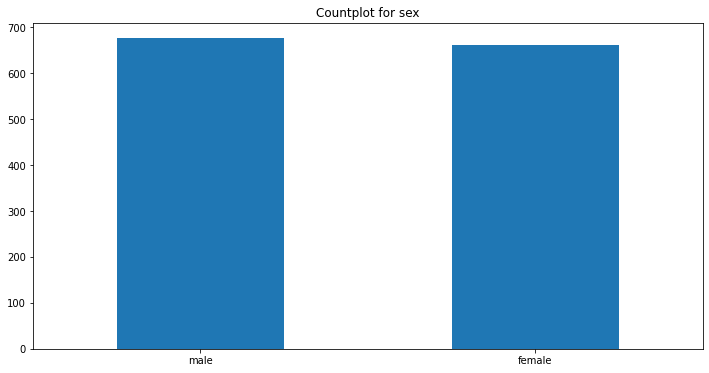

In [7]:
plt.figure(figsize = (12,6))
fig = train['sex'].value_counts().plot(kind = "bar")
plt.title("Countplot for sex")
plt.xticks(rotation = 0)
plt.show(fig)

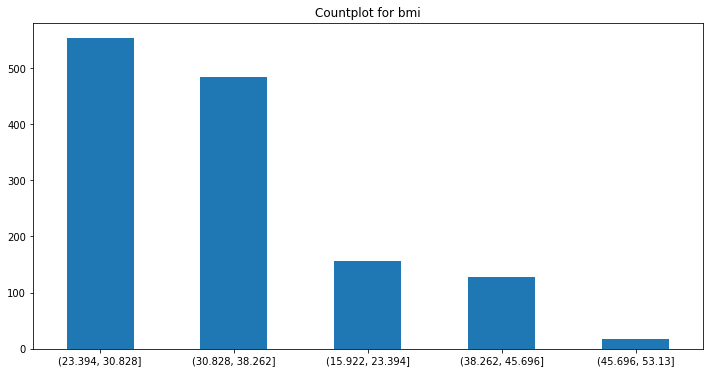

In [11]:
plt.figure(figsize = (12,6))
fig = train['bmi'].value_counts(normalize = False , bins = 5).plot(kind = "bar")
plt.title("Countplot for bmi")
plt.xticks(rotation = 0)
plt.show(fig)

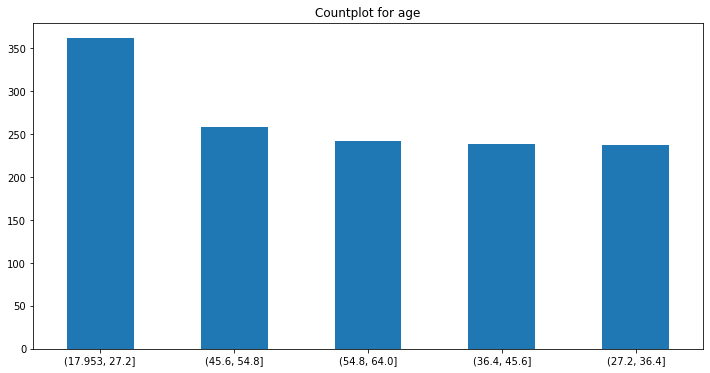

In [49]:
plt.figure(figsize = (12,6))
fig = train['age'].value_counts(normalize = False , bins = 5).plot(kind = "bar")
plt.title("Countplot for age")
plt.xticks(rotation = 0)
plt.show(fig)

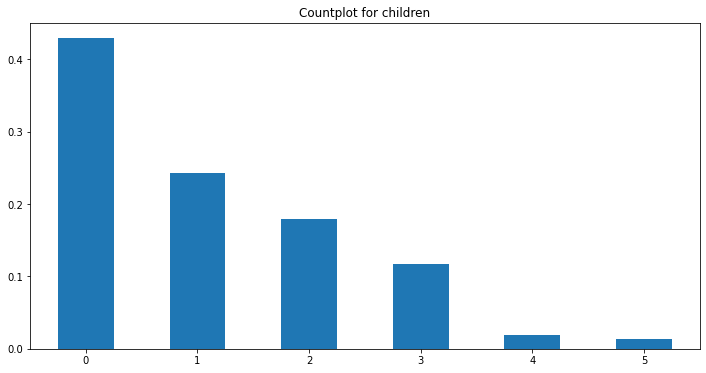

In [13]:
plt.figure(figsize = (12,6))
fig = train['children'].value_counts(normalize = True).plot(kind = "bar")
plt.title("Countplot for children")
plt.xticks(rotation = 0)
plt.show(fig)

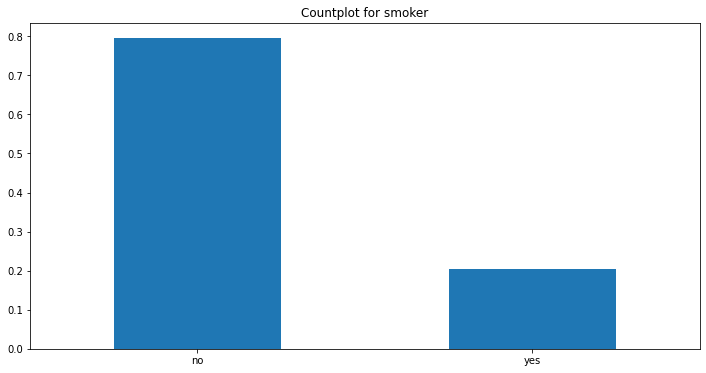

In [15]:
plt.figure(figsize = (12,6))
fig = train['smoker'].value_counts(normalize = True).plot(kind = "bar")
plt.title("Countplot for smoker")
plt.xticks(rotation = 0)
plt.show(fig)

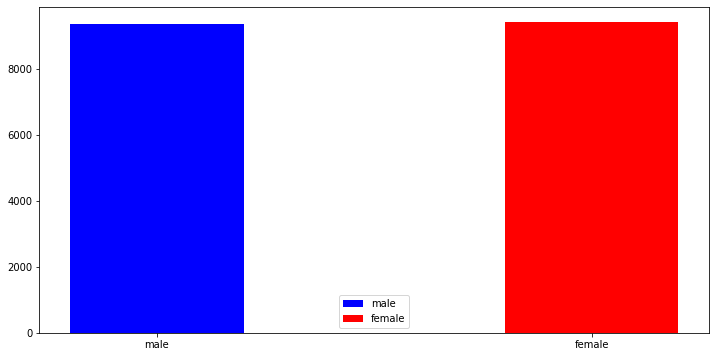

In [40]:
df1 = train[train['sex'] == "male"]
df2 = train[train["sex"] == "female"]

plt.figure(figsize = (12,6))

plt.bar(df1['sex'].unique()[0] , np.median(df1['charges']) , color = "blue" , label = "male" , width = 0.4 , align = "center")
plt.bar(df2['sex'].unique()[0] , np.median(df2['charges']) , color = "red" , label = "female" , width = 0.4 , align = "center")
plt.legend()

plt.show()

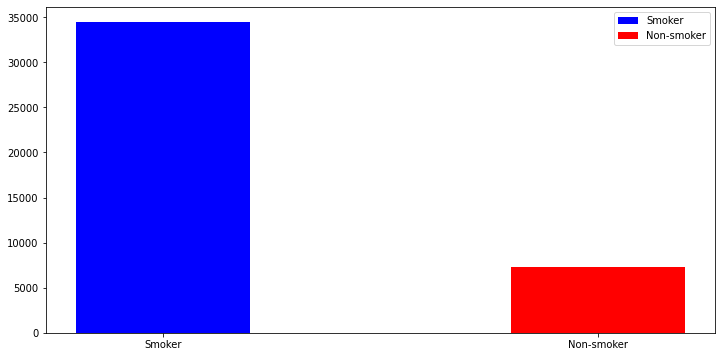

In [31]:
df1 = train[train['smoker'] == "yes"]
df2 = train[train["smoker"] == "no"]

plt.figure(figsize = (12,6))

plt.bar( "Smoker" , np.median(df1['charges']) , color = "blue" , label = "Smoker" , width = 0.4)
plt.bar( "Non-smoker" , np.median(df2['charges']) , color = "red" , label = "Non-smoker" , width = 0.4)
plt.legend()

plt.show()

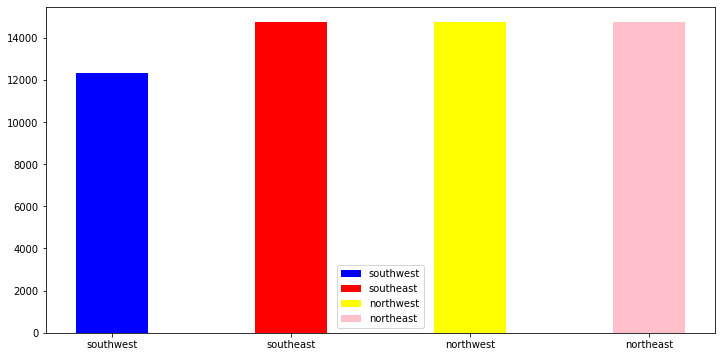

In [44]:
df1 = train[train['region'] == "southwest"]
df2 = train[train['region'] == "southeast"]
df3 = train[train['region'] == "northwest"]
df4 = train[train['region'] == "northeast"]


plt.figure(figsize = (12,6))

plt.bar( "southwest" , np.mean(df1['charges']) , color = "blue" , label = "southwest" , width = 0.4)
plt.bar( "southeast" , np.mean(df2['charges']) , color = "red" , label = "southeast" , width = 0.4)
plt.bar( "northwest" , np.mean(df2['charges']) , color = "yellow" , label = "northwest" , width = 0.4)
plt.bar( "northeast" , np.mean(df2['charges']) , color = "pink" , label = "northeast" , width = 0.4)
plt.legend()

plt.show()

In [ ]:
'''
southeast    364
southwest    325
northwest    325
northeast    324
'''

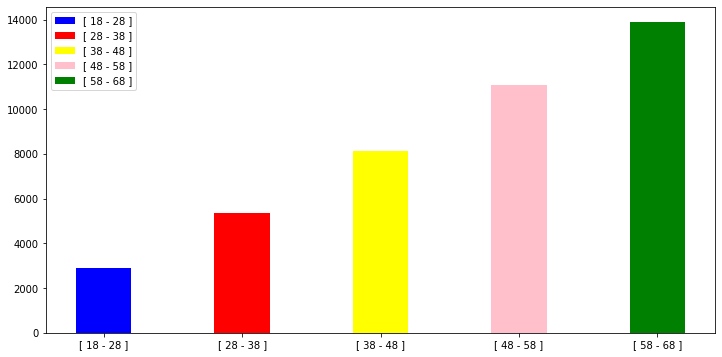

In [58]:
df1 = train[(train['age'] >= 18) &  (train['age'] < 28)]
df2 = train[(train['age'] >= 28) &  (train['age'] < 38)]
df3 = train[(train['age'] >= 38) &  (train['age'] < 48)]
df4 = train[(train['age'] >= 48) &  (train['age'] < 58)]
df5 = train[(train['age'] >= 58) &  (train['age'] < 68)]


plt.figure(figsize = (12,6))

plt.bar( "[ 18 - 28 ]" , np.median(df1['charges']) , color = "blue" , label = "[ 18 - 28 ]" , width = 0.4)
plt.bar( "[ 28 - 38 ]" , np.median(df2['charges']) , color = "red" , label = "[ 28 - 38 ]" , width = 0.4)
plt.bar( "[ 38 - 48 ]" , np.median(df3['charges']) , color = "yellow" , label = "[ 38 - 48 ]" , width = 0.4)
plt.bar( "[ 48 - 58 ]" , np.median(df4['charges']) , color = "pink" , label = "[ 48 - 58 ]" , width = 0.4)
plt.bar( "[ 58 - 68 ]" , np.median(df5['charges']) , color = "green" , label = "[ 58 - 68 ]" , width = 0.4)
plt.legend()

plt.show()

In [ ]:
train["sex"] = np.where(train['sex'] == "male" , 0 , 1) 

In [ ]:
train["smoker"] = np.where(train['smoker'] == "yes" , 0 , 1) 

In [ ]:
train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(np.array(train["bmi"]).reshape(-1,1))
train_scaled_bmi = pd.DataFrame(scaler.transform(np.array(train["bmi"]).reshape(-1,1)),columns = ["bmi"])


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(np.array(train["age"]).reshape(-1,1))
train_scaled_age = pd.DataFrame(scaler.transform(np.array(train["age"]).reshape(-1,1)),columns = ["age"])

In [ ]:
train_scaled.head(10)

,bmi
0,-0.453320
1,0.509621
2,0.383307
3,-1.305531
4,-0.292556
5,-0.807656
6,0.455486
7,-0.479567
8,-0.136714
9,-0.791252


In [ ]:
train.drop(["bmi"] , axis = 1 , inplace = True)
train.drop(["age"] , axis = 1 , inplace = True)

In [ ]:
train = pd.concat([train , train_scaled_bmi , train_scaled_age] , axis = 1)

In [ ]:
train.head(10)

,sex,children,smoker,region,charges,bmi,age
0,1,0,0,southwest,16884.92400,-0.453320,-1.438764
1,0,1,1,southeast,1725.55230,0.509621,-1.509965
2,0,3,1,southeast,4449.46200,0.383307,-0.797954
3,0,0,1,northwest,21984.47061,-1.305531,-0.441948
4,0,0,1,northwest,3866.85520,-0.292556,-0.513149
5,1,0,1,southeast,3756.62160,-0.807656,-0.584350
6,1,1,1,southeast,8240.58960,0.455486,0.483668
7,1,3,1,northwest,7281.50560,-0.479567,-0.157143
8,0,2,1,northeast,6406.41070,-0.136714,-0.157143
9,1,0,1,northwest,28923.13692,-0.791252,1.480485


In [ ]:
train.isnull().sum()

sex         0
children    0
smoker      0
region      0
charges     0
bmi         0
age         0
dtype: int64

In [ ]:
train.drop(['region'] ,axis = 1 , inplace = True)

In [ ]:
train.head()

,sex,children,smoker,charges,bmi,age
0,1,0,0,16884.92400,-0.453320,-1.438764
1,0,1,1,1725.55230,0.509621,-1.509965
2,0,3,1,4449.46200,0.383307,-0.797954
3,0,0,1,21984.47061,-1.305531,-0.441948
4,0,0,1,3866.85520,-0.292556,-0.513149


In [ ]:
import pandas as pd 
 
train_size = int(0.8 * len(train))


train_set = train.iloc[:train_size , : ]
val_set = train.iloc[train_size: , : ]

In [ ]:
X_train = train_set.drop(['charges'],axis = 1)
X_val = val_set.drop(["charges"],axis = 1)
y_train = train_set["charges"]
y_val = val_set["charges"]

In [ ]:
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # weight initialization
          
        self.W = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y
          
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  
      
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
      
        return X.dot( self.W ) + self.b


In [ ]:
lr = LinearRegression(0.09 , 5000)
lr.fit(X_train , y_train)

In [ ]:
y_preds = lr.predict(X_val)

In [ ]:
y_preds = np.array(y_preds)

In [ ]:
print(mean_squared_error(y_val , y_preds))


37015343.96284566
